# Main Metrics

This notebook:

1) Loads a list of stories and speed metric results as input

2) Computes following ratios and indices

1. signed (%)
2. digital first (0 to 100)
* international (%)
* varied (0 to 100)
* fast (0 to 100)
* mobile speed (0 to 100)

3) Exports data for the selected time frame

For current performance results, mobile_metrics.ipynb and speed_metrics.ipynb need to be run before this notebook.

Feel free to contact me for help: https://www.quel-media.com/about.html#contact

© Paul Ronga under Apache-2 Licence (see LICENCE.txt).

In [1]:
import pandas as pd
import requests
from IPython.display import HTML
import json
from bs4 import BeautifulSoup
import datetime

In [2]:
medias = pd.read_csv('df/media_list.csv', usecols=['media_id', 'Name'])

In [12]:
delta_weeks = 1
df = pd.read_csv('df/stories_no_lm.csv', usecols = ['id', 'title', 'absolute_url', 'time_start', 'time_end', 'minutes',
       'delta_str', 'link', 'media', 'media_id', 'story_time', 'agency', 'editor', 'heading', 'domains'])

### Select time frame using date index

In [13]:
df[df['media_id'] == 24]['link'].apply(lambda x: x.count('monde')).value_counts()

0    256
1     73
2      1
Name: link, dtype: int64

In [21]:
df[df['media_id'] == 24].groupby(['heading'])['minutes'].sum()

heading
adblock           108
entertainment      45
faits_divers      342
geneve           1194
life              150
monde             336
mondial2018      2463
romandie         1038
sports             81
suisse           1581
vaud             2463
Name: minutes, dtype: int64

In [34]:
df[(df['media_id'].isin([25])) & (df['heading'] == 'monde')].sort_values(['minutes'], ascending=False)

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains
time_start,,,,,,,,,,,,,,,
2018-06-20 00:33:00,14695,Inculpation du profil ADN d'un violeur aux USA,https://www.lematin.ch/monde/inculpation-profi...,2018-06-20 00:33:00,2018-06-20 04:30:00,237,3h57,/monde/inculpation-profil-adn-violeur-usa/stor...,https://www.lematin.ch/,25,0.2667,0,0,monde,NaN
2018-06-18 22:36:00,14476,Merkel veut soutenir l'Italie sur l'immigration,https://www.lematin.ch/monde/merkel-veut-soute...,2018-06-18 22:36:00,2018-06-19 00:48:00,132,2h12,/monde/merkel-veut-soutenir-italie-limmigratio...,https://www.lematin.ch/,25,0.0875,0,0,monde,NaN
2018-06-20 08:33:00,14716,Taxi suisse VIP séquestré en Grèce,https://www.lematin.ch/monde/europe/taxi-suiss...,2018-06-20 08:33:00,2018-06-20 10:21:00,108,1h48,/monde/europe/taxi-suisse-vip-sequestre-grece/...,https://www.lematin.ch/,25,0.0883,0,0,monde,NaN
2018-06-19 10:21:00,14529,Macron recadre un ado: «Tu m'appelles Monsieur...,https://www.lematin.ch/monde/macron-recadre-ad...,2018-06-19 10:21:00,2018-06-19 11:48:00,87,1h27,/monde/macron-recadre-ado-m-appelles-monsieur-...,https://www.lematin.ch/,25,0.1504,0,0,monde,NaN
2018-06-19 04:33:00,14493,Kim Jong Un en Chine mardi et mercredi,https://www.lematin.ch/monde/kim-jong-chine-ma...,2018-06-19 04:33:00,2018-06-19 05:24:00,51,51’,/monde/kim-jong-chine-mardi-mercredi/story/286...,https://www.lematin.ch/,25,0.3905,0,0,monde,NaN
2018-06-20 04:30:00,14697,Migrants séparés: Trump persiste et signe,https://www.lematin.ch/monde/migrants-separes-...,2018-06-20 04:30:00,2018-06-20 05:21:00,51,51’,/monde/migrants-separes-trump-persiste/story/3...,https://www.lematin.ch/,25,0.4192,0,0,monde,NaN
2018-06-19 00:48:00,14483,Familles de migrants séparées: Trump insiste,https://www.lematin.ch/monde/familles-migrants...,2018-06-19 00:48:00,2018-06-19 01:21:00,33,33’,/monde/familles-migrants-separees-trump-insist...,https://www.lematin.ch/,25,0.1536,0,0,monde,NaN
2018-06-20 18:21:00,14839,Trump fait volte-face sur la séparation des fa...,https://www.lematin.ch/monde/trump-volteface-s...,2018-06-20 18:21:00,2018-06-20 18:48:00,27,27’,/monde/trump-volteface-separation-familles/sto...,https://www.lematin.ch/,25,0.1525,0,0,monde,NaN
2018-06-22 07:00:00,15406,Melania fait scandale à la frontière mexicaine,https://www.lematin.ch/monde/melania-frontiere...,2018-06-22 07:00:00,2018-06-22 07:12:00,12,12’,/monde/melania-frontiere-mexique/story/11911235,https://www.lematin.ch/,25,0.0977,0,0,monde,NaN


In [25]:
# Le Matin
df[df['media_id'] == 25]['heading'].value_counts()

coupe-du-monde                                    43
suisse                                            26
monde                                             10
faits-divers                                       8
sports                                             5
economie                                           3
news                                               2
people                                             2
high-tech                                          2
societe                                            2
navlematindimanche                                 1
sante-environnement                                1
mbappe-veut-boycotter-presse-jusqu-fin-mondial     1
Name: heading, dtype: int64

In [26]:
# 20 minutes
df[df['media_id'] == 24]['heading'].value_counts()

mondial2018      19
suisse           14
vaud             12
geneve           12
romandie          7
monde             4
faits_divers      3
life              1
adblock           1
sports            1
entertainment     1
Name: heading, dtype: int64

In [16]:
# Get and check the last week's time frame

today = datetime.datetime.now()
delta_days = (today.weekday() + 1) % 7
today - datetime.timedelta(7 + delta_days)


last_sunday = today - datetime.timedelta(delta_days)
last_monday = last_sunday - datetime.timedelta(6)
print('Last Sunday should be {}, {} days ago.'.format(last_sunday.strftime('%B %d') , delta_days ))
print('The previous Monday should be {}.'.format(last_monday.strftime('%B %d') , delta_days ))

Last Sunday should be July 01, 4 days ago.
The previous Monday should be June 25.


In [17]:
# For previous weeks

last_monday = last_monday - datetime.timedelta(delta_weeks*7)
last_sunday = last_sunday - datetime.timedelta(delta_weeks*7)
print('Selected Monday is now {}.'.format(last_monday.strftime('%B %d')))
print('Selected Sunday is now {}.'.format(last_sunday.strftime('%B %d')))

Selected Monday is now June 18.
Selected Sunday is now June 24.


In [18]:
# Date index
df['time_start'] = pd.to_datetime(df['time_start'])
df['time_end'] = pd.to_datetime(df['time_end'])
df.index = df['time_start']

In [19]:
start_timestamp = last_monday.strftime('%Y-%m-%d')
end_timestamp = last_sunday.strftime('%Y-%m-%d')
df[start_timestamp:end_timestamp].shape

(895, 15)

In [20]:
df = df[start_timestamp:end_timestamp].copy()

In [250]:
# Check for errors
df[df['link'] != df['link']]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains
time_start,,,,,,,,,,,,,,,


In [251]:
df = df[df['link'] == df['link']].copy()
df = df[df['link'] != '#'].copy()

### Get back to numeric index

In [252]:
df.index = df.id

In [253]:
# On retire Konbini Suisse et France et Le Monde
df = df[(df['media_id'] < 34) & (df['media_id'] != 22)].copy()
medias = medias[(medias['media_id'] < 34) & (medias['media_id'] != 22)].copy()

# 1. “Signed” ratio

In [254]:
def getEditorRatio(_group):
    if len(_group) == 0:
        print('Error: length is 0')
        return False
    print('Editor ratio for {}: {} / {}'.format(_group['media'].values[0], len(_group[_group['editor'] == 1]), len(_group)))
    return len(_group[_group['editor'] == 1]) / len(_group)

In [255]:
# Fix for La Liberté using the story path
for i, row in df[df['media_id'] == 32].iterrows():
    if row['link'].split('/')[1] == 'news-agence':
        df.at[i, 'agency'] = 1
        df.at[i, 'editor'] = 0
    else:
        df.at[i, 'editor'] = 1
        df.at[i, 'agency'] = 0

In [256]:
medias['signed'] = -1
for i, row in medias.iterrows():
    print(i)
    group = df[df['media_id'] == row['media_id']]
    editorRatio = getEditorRatio(group)
    print(editorRatio, round(editorRatio * 100))
    medias.at[i, 'signed'] = round(editorRatio * 100)

0
Editor ratio for https://www.tdg.ch/: 25 / 51
0.49019607843137253 49
1
Editor ratio for https://www.24heures.ch: 21 / 33
0.6363636363636364 64
2
Editor ratio for https://www.letemps.ch: 46 / 94
0.48936170212765956 49
4
Editor ratio for https://www.rts.ch/info/: 0 / 135
0.0 0
5
Editor ratio for https://www.20min.ch/ro/: 14 / 84
0.16666666666666666 17
6
Editor ratio for https://www.lematin.ch/: 24 / 135
0.17777777777777778 18
7
Editor ratio for https://www.mediapart.fr: 15 / 19
0.7894736842105263 79
8
Editor ratio for https://www.lefigaro.fr/: 36 / 79
0.45569620253164556 46
9
Editor ratio for https://www.liberation.fr/: 46 / 61
0.7540983606557377 75
10
Editor ratio for https://www.lacote.ch/: 25 / 66
0.3787878787878788 38
11
Editor ratio for https://www.arcinfo.ch/: 19 / 70
0.2714285714285714 27
12
Editor ratio for https://www.lenouvelliste.ch/: 25 / 78
0.32051282051282054 32
13
Editor ratio for https://www.laliberte.ch/: 19 / 31
0.6129032258064516 61
14
Editor ratio for https://lecour

In [257]:
medias

,media_id,Name,signed
0,19,La Tribune de Genève,49
1,20,24 heures,64
2,21,Le Temps,49
4,23,RTS info,0
5,24,20 minutes (ch),17
6,25,Le Matin,18
7,26,Mediapart,79
8,27,Le Figaro,46
9,28,Libération,75
10,29,La Côte,38


## minutes_day
Ajouter une colonne minutes_day ne comptant que les minutes du jour.
Même principe pour les minutes des heures à fort trafic: 7h-8h, 12h-13h

In [258]:
sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

In [259]:
sevenAM.strftime('%H:%M'), elevenPM.strftime('%H:%M')

('07:00', '23:00')

In [260]:
df['minutes_day'] = 0

In [261]:
# NB changer pour >= et mettre la fin à 23h00?
# Actuellement: fausse les résultats pour un papier publié p.ex. de 23h30 à minuit -> à 23h

sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

for i, row in df.iterrows():
    if row['time_end'] != row['time_end']: # NaT
        continue
    startTime = row['time_start'].time()
    endTime = row['time_end'].time()
    if startTime.hour < 7:
        startTime = sevenAM
    elif startTime.hour > 23:
        startTime = elevenPM
    if endTime.hour < 7:
        endTime = sevenAM
    elif endTime.hour >= 23:
        endTime = elevenPM
        
    startDate = datetime.datetime.combine(row['time_start'].date(), startTime)
    endDate = datetime.datetime.combine(row['time_end'].date(), endTime)
    delta = endDate - startDate
    if delta != 0:
        df.at[i, 'minutes_day'] = round(delta.seconds / 60)
    else:
        df.at[i, 'minutes_day'] = 0

In [262]:
# Check results
df[['time_start', 'time_end', 'minutes', 'minutes_day']]

,time_start,time_end,minutes,minutes_day
id,,,,
10184,2018-05-28 00:18:00,2018-05-28 07:03:00,405,3
10185,2018-05-28 00:27:00,2018-05-28 06:57:00,390,0
10186,2018-05-28 03:39:00,2018-05-28 05:42:00,123,0
10187,2018-05-28 05:42:00,2018-05-28 06:06:00,24,0
10188,2018-05-28 06:06:00,2018-05-28 06:30:00,24,0
10189,2018-05-28 06:30:00,2018-05-28 07:12:00,42,12
10190,2018-05-28 06:39:00,2018-05-28 07:24:00,45,24
10191,2018-05-28 06:48:00,2018-05-28 09:24:00,156,144
10192,2018-05-28 06:54:00,2018-05-28 10:45:00,231,225


In [263]:
# Have a look at some absolute values

targetMedia = 22 # Le Monde

top_headings = df[df['media_id'] == targetMedia]['heading'].value_counts().head(2).index

top_sum = 0
for heading in top_headings:
    results = df[(df['media_id'] == targetMedia) & (df['heading'] == heading)]
    print(heading, len(results), results['minutes'].sum(), results['minutes_day'].sum())
    
    results_day = results[results['minutes_day'] != 0]
    print('Durée moyenne: {} minutes'.format( results_day['minutes_day'].sum() / len(results_day) ))
    
    top_sum += results['minutes_day'].sum()
    
print("Part des deux rubriques principales:", top_sum / df[(df['media_id'] == targetMedia)]['minutes_day'].sum())

Part des deux rubriques principales: nan


/Users/paul/.virtualenvs/dataanalysis/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [264]:
# Absolute values in hours (rounded down)
# All this needs to be refined
for media_id in medias['media_id'].tolist():
    # Heures
    print(medias[medias['media_id'] == media_id]['Name'].values[0])
    heading_times = df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum()//60
    print(heading_times.sort_values(ascending=False).head(10))

La Tribune de Genève
heading
geneve             88
monde              32
economie           19
news               11
suisse              9
faits-divers-lm     2
Name: minutes_day, dtype: int64
24 heures
heading
vaud-regions       121
suisse              11
vivre                8
economie             8
monde                7
sports               5
faits-divers-lm      5
Name: minutes_day, dtype: int64
Le Temps
heading
monde                               53
suisse                              34
economie                            24
sport                               14
regain-dactivite-groupe-ei-syrie     9
culture                              9
opinions                             8
societe                              4
images                               4
lifestyle                            3
Name: minutes_day, dtype: int64
RTS info
heading
monde            97
suisse           33
regions          32
economie         12
culture          10
sciences-tech     2
Name: minutes_day, d

In [265]:
heading_times.std()

10.028530728448139

In [266]:
# Relative values
for media_id in medias['media_id'].tolist():
    # Heures
    theMedia = medias[medias['media_id'] == media_id]
    mediaSum = df[df['media_id'] == media_id]['minutes_day'].sum()
    print(theMedia['Name'].values[0], 'total:', mediaSum)
    heading_times = (round(100 * df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum() / mediaSum)).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    print('Dev', round(heading_times['minutes_day'].std()), 'top5',round(heading_times.sort_values('minutes_day', ascending=False).head().std()))
    
    #others = 100 - heading_times[heading_times['minutes_day'] >= 5]['minutes_day'].sum()
    #heading_times.loc['autres'] = {'minutes_day': others}
    #print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())



La Tribune de Genève total: 10023
Dev 19.0 top5 minutes_day    19.0
dtype: float64
24 heures total: 10080
Dev 30.0 top5 minutes_day    30.0
dtype: float64
Le Temps total: 10089
Dev 10.0 top5 minutes_day    10.0
dtype: float64
RTS info total: 11388
Dev 18.0 top5 minutes_day    18.0
dtype: float64
20 minutes (ch) total: 10074
Dev 6.0 top5 minutes_day    6.0
dtype: float64
Le Matin total: 11415
Dev 13.0 top5 minutes_day    13.0
dtype: float64
Mediapart total: 9717
Dev 8.0 top5 minutes_day    8.0
dtype: float64
Le Figaro total: 9972
Dev 14.0 top5 minutes_day    14.0
dtype: float64
Libération total: 9813
Dev 14.0 top5 minutes_day    14.0
dtype: float64
La Côte total: 9306
Dev 22.0 top5 minutes_day    22.0
dtype: float64
Arcinfo total: 10053
Dev 13.0 top5 minutes_day    14.0
dtype: float64
Le Nouvelliste total: 10065
Dev 9.0 top5 minutes_day    8.0
dtype: float64
La Liberté total: 10032
Dev 14.0 top5 minutes_day    16.0
dtype: float64
Le Courrier total: 6627
Dev 6.0 top5 minutes_day    6.0
d

In [267]:
heading_times.sort_values('minutes_day', ascending=False).head(2)

,minutes_day
heading,
Vaud,26.0
Genève,22.0


In [268]:
def getVariedRatioByTop(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    
    return 100 - round(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())

In [269]:
def getVariedRatioByStd(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    
    # print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())
    return 500 / round(heading_times.sort_values('minutes_day', ascending=False).head().std())

In [270]:
medias['varied'] = -1

for i, row in medias.iterrows():
    group = df[df['media_id'] == row['media_id']]
    medias.at[i, 'varied'] = (getVariedRatioByTop(group) + getVariedRatioByStd(group)) / 2

medias

,media_id,Name,signed,varied
0,19,La Tribune de Genève,49,26
1,20,24 heures,64,18
2,21,Le Temps,49,49
4,23,RTS info,0,29
5,24,20 minutes (ch),17,69
6,25,Le Matin,18,35
7,26,Mediapart,79,33
8,27,Le Figaro,46,42
9,28,Libération,75,26
10,29,La Côte,38,23


In [271]:
heading_times['heading'] = heading_times.index

# 3. “international” ratio

In [272]:
df[df['heading'] != df['heading']]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains,minutes_day
id,,,,,,,,,,,,,,,,
10319,10319,Quel joueur de légende êtes-vous?,https://www.tdg.ch/extern/interactive_wch/2018/mondial/?openincontroller,2018-05-28 17:18:00,2018-05-28 17:33:00,15,15’,https://www.tdg.ch/extern/interactive_wch/2018/mondial/?openincontroller,https://www.tdg.ch/,19,0.1420,0,0,NaN,NaN,15
10323,10323,Quel joueur de légende êtes-vous?,https://www.tdg.ch/extern/interactive_wch/mondial/,2018-05-28 17:33:00,2018-05-28 20:09:00,156,2h36,https://www.tdg.ch/extern/interactive_wch/mondial/,https://www.tdg.ch/,19,0.0644,0,0,NaN,NaN,156
10711,10711,Le GHI et Lausanne-Cité échappent à Christophe Blocher,https://lecourrier.ch/2018/05/30/le-ghi-et-lausanne-cite-echappent-a-christophe-blocher/,2018-05-30 18:27:00,2018-05-30 18:36:00,9,9’,https://lecourrier.ch/2018/05/30/le-ghi-et-lausanne-cite-echappent-a-christophe-blocher/,https://lecourrier.ch/,33,1.3987,0,1,NaN,NaN,9
10713,10713,Le GHI et Lausanne-Cité échappent à Christoph Blocher,https://lecourrier.ch/2018/05/30/le-ghi-et-lausanne-cite-echappent-a-christoph-blocher/,2018-05-30 18:36:00,2018-05-30 18:48:00,12,12’,https://lecourrier.ch/2018/05/30/le-ghi-et-lausanne-cite-echappent-a-christoph-blocher/,https://lecourrier.ch/,33,1.7132,0,1,NaN,NaN,12


In [273]:
df['heading'].fillna('', inplace=True)

In [274]:
df[df['heading'].str.contains('olidarité')]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains,minutes_day
id,,,,,,,,,,,,,,,,
11034,11034,La peur de la mort règne chez Nestlé,https://lecourrier.ch/2018/06/01/la-peur-de-la-mort-regne-chez-nestle/,2018-06-01 15:00:00,2018-06-03 19:39:00,3159,52h39,https://lecourrier.ch/2018/06/01/la-peur-de-la-mort-regne-chez-nestle/,https://lecourrier.ch/,33,1.2578,0,1,Solidarité,NaN,279


In [275]:
def getInternationalRatio(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    regexp = 'international|monde$'
    if len(_group) > 0:
        print(_group['media_id'].values[0])
#    Solidarité
    # monde$ to avoid “coupe du monde au brésil”
    result = heading_times[heading_times.index.str.contains(regexp, flags=re.IGNORECASE)]
    print(*result.index.tolist())
    return result['minutes_day'].sum()

In [276]:
medias['international'] = -1
import re
for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'international'] = getInternationalRatio(group)
medias

19
monde
20
monde
21
monde
23
monde
24
monde
25
monde
26
international
27
international
28
international
29
monde
30
monde
31
monde
32

33
International


,media_id,Name,signed,varied,international
0,19,La Tribune de Genève,49,26,20
1,20,24 heures,64,18,5
2,21,Le Temps,49,49,32
4,23,RTS info,0,29,51
5,24,20 minutes (ch),17,69,22
6,25,Le Matin,18,35,18
7,26,Mediapart,79,33,54
8,27,Le Figaro,46,42,39
9,28,Libération,75,26,40
10,29,La Côte,38,23,6


In [277]:
medias['international'] = -1
import re
for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'international'] = getInternationalRatio(group)
medias

19
monde
20
monde
21
monde
23
monde
24
monde
25
monde
26
international
27
international
28
international
29
monde
30
monde
31
monde
32

33
International


,media_id,Name,signed,varied,international
0,19,La Tribune de Genève,49,26,20
1,20,24 heures,64,18,5
2,21,Le Temps,49,49,32
4,23,RTS info,0,29,51
5,24,20 minutes (ch),17,69,22
6,25,Le Matin,18,35,18
7,26,Mediapart,79,33,54
8,27,Le Figaro,46,42,39
9,28,Libération,75,26,40
10,29,La Côte,38,23,6


# “Digital first” index

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt

In [279]:
len(df[(df['media_id'] == 19) & (df['editor'] == 1)])



25

In [280]:
len(df[(df['media_id'] == 25) & (df['editor'] == 1)])




24

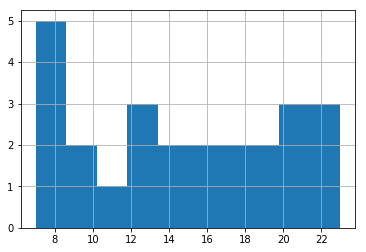

In [281]:
# Tribune de Genève
group = df[(df['media_id'] == 19) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

In [282]:
pd.set_option('display.max_colwidth', 500)

In [283]:
df[(df['media_id'] == 25) & (df['editor'] == 1) & (df['time_start'].dt.hour < 16)]['heading'].value_counts()

suisse          9
sports          4
faits-divers    4
people          1
monde           1
Name: heading, dtype: int64

In [284]:
for key, item in df[(df['media_id'] == 25) & (df['editor'] == 1) & (df['time_start'].dt.hour < 16)].sort_index()['absolute_url'].drop_duplicates().to_dict().items():
    print(key, item)

10944 https://www.lematin.ch/suisse/fuite-ado-vecu-horreur/story/29101298
10275 https://www.lematin.ch/people/fils-pierre-bellemare-pensait-tele/story/17649139
10660 https://www.lematin.ch/monde/bientot-copilote-avion/story/10100715
11153 https://www.lematin.ch/suisse/grand-saut-matin/story/29211966
10409 https://www.lematin.ch/suisse/vends-maison-orange-quittons-suisse/story/27448175
10431 https://www.lematin.ch/faits-divers/sursis-agriculteur-violent/story/26707012
10957 https://www.lematin.ch/suisse/alexia-14-ans-retrouvee-saine-sauve-train/story/29101298
11312 https://www.lematin.ch/sports/football/ceramique-alcool-riz-europe-villarreal-cf/story/21234534
10257 https://www.lematin.ch/sports/tennis/direct-wawrinka-lice-paris/story/11026566
10642 https://www.lematin.ch/suisse/pierre-maudet-rentre-teheran-jet-prive/story/25281003
10627 https://www.lematin.ch/suisse/guerre-ouverte-executif-vevey/story/14553726
10805 https://www.lematin.ch/faits-divers/impossible-fugitif-revenir-suisse/s

In [285]:
df.index = df.time_start

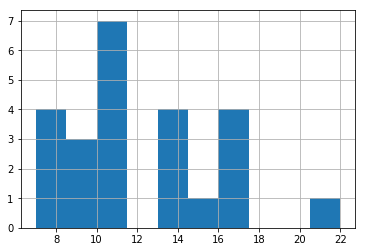

In [286]:
# Le Matin
group = df[(df['media_id'] == 25) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

group = group[(group['time_start'].dt.hour > 7) & (group['time_start'].dt.hour < 24) & (group['editor'] == 1)]

if len(group) < 1:
    print('No signed stories found')

morning = group[group.index.hour < 16]
evening = group[group.index.hour >= 16]

In [287]:
int( round( 100 * (len(morning)-3) / len(group) ) )

62

In [288]:
def getDigitalFirstRatio(_group):
    _group = _group[(_group['time_start'].dt.hour > 7) & (_group['time_start'].dt.hour < 24) & (_group['editor'] == 1)]
    
    if len(_group) < 1:
        print('No signed stories found')
        return -1
    
    morning = _group[_group.index.hour < 16]
    evening = _group[_group.index.hour >= 16]
    
    return int( round( 100 * len(morning) / len(_group) ) )

In [289]:
medias['digitalfirst'] = -1

for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'digitalfirst'] = getDigitalFirstRatio(group)
medias

No signed stories found


,media_id,Name,signed,varied,international,digitalfirst
0,19,La Tribune de Genève,49,26,20,48
1,20,24 heures,64,18,5,30
2,21,Le Temps,49,49,32,51
4,23,RTS info,0,29,51,-1
5,24,20 minutes (ch),17,69,22,44
6,25,Le Matin,18,35,18,76
7,26,Mediapart,79,33,54,93
8,27,Le Figaro,46,42,39,45
9,28,Libération,75,26,40,40
10,29,La Côte,38,23,6,61


# 5. “Fast” index

In [290]:
df_speed = pd.read_csv('df/speed_metrics.csv', usecols=['fully_loaded_time', 'media_id', 'page_load_time',
       'pagespeed_score', 'report_url'])

In [291]:
dfm = medias.merge(df_speed, on='media_id')

In [292]:
dfm['fast'] = -1
for i, row in dfm.iterrows():
    # threshold for e-commerce according to Google: 2 seconds
    # let's be very nice and say: 5 seconds
    pageLoadExcess = row['page_load_time'] - 5
    
    # no negative index
    if pageLoadExcess < 0:
        pageLoadExcess = 0

    # Some websites take more than 30 seconds to load. It seems we need to give up using something exponential
    # loadIndex = pow(pageLoadExcess, 1.1)
    
    loadIndex = 5 * pageLoadExcess
    pageLoadRatio = 100 - loadIndex
    if pageLoadRatio < 0:
        pageLoadRatio = 0

    dfm.at[i, 'fast'] = (pageLoadRatio + row['pagespeed_score']*3) / 4
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url,fast
0,19,La Tribune de Genève,49,26,20,48,24,11.406,12.530,https://gtmetrix.com/reports/www.tdg.ch/XzfWi3ZN,34
1,20,24 heures,64,18,5,30,24,10.227,12.554,https://gtmetrix.com/reports/www.24heures.ch/gJt51yii,36
2,21,Le Temps,49,49,32,51,57,11.670,13.401,https://gtmetrix.com/reports/www.letemps.ch/ZvZX6zjs,59
3,23,RTS info,0,29,51,-1,56,6.928,7.352,https://gtmetrix.com/reports/www.rts.ch/Hbm4Tm1g,64
4,24,20 minutes (ch),17,69,22,44,10,10.598,11.360,https://gtmetrix.com/reports/www.20min.ch/qQ67DZL7,25
5,25,Le Matin,18,35,18,76,0,35.913,37.147,https://gtmetrix.com/reports/www.lematin.ch/L81y9o8F,0
6,26,Mediapart,79,33,54,93,20,5.047,5.602,https://gtmetrix.com/reports/www.mediapart.fr/4IczDLKv,39
7,27,Le Figaro,46,42,39,45,30,11.330,29.547,https://gtmetrix.com/reports/www.lefigaro.fr/LBH7CkFS,39
8,28,Libération,75,26,40,40,11,11.040,19.189,https://gtmetrix.com/reports/www.liberation.fr/BdA6Jilz,25
9,29,La Côte,38,23,6,61,44,12.112,18.406,https://gtmetrix.com/reports/www.lacote.ch/ko8NRJPT,49


In [293]:
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url,fast
0,19,La Tribune de Genève,49,26,20,48,24,11.406,12.530,https://gtmetrix.com/reports/www.tdg.ch/XzfWi3ZN,34
1,20,24 heures,64,18,5,30,24,10.227,12.554,https://gtmetrix.com/reports/www.24heures.ch/gJt51yii,36
2,21,Le Temps,49,49,32,51,57,11.670,13.401,https://gtmetrix.com/reports/www.letemps.ch/ZvZX6zjs,59
3,23,RTS info,0,29,51,-1,56,6.928,7.352,https://gtmetrix.com/reports/www.rts.ch/Hbm4Tm1g,64
4,24,20 minutes (ch),17,69,22,44,10,10.598,11.360,https://gtmetrix.com/reports/www.20min.ch/qQ67DZL7,25
5,25,Le Matin,18,35,18,76,0,35.913,37.147,https://gtmetrix.com/reports/www.lematin.ch/L81y9o8F,0
6,26,Mediapart,79,33,54,93,20,5.047,5.602,https://gtmetrix.com/reports/www.mediapart.fr/4IczDLKv,39
7,27,Le Figaro,46,42,39,45,30,11.330,29.547,https://gtmetrix.com/reports/www.lefigaro.fr/LBH7CkFS,39
8,28,Libération,75,26,40,40,11,11.040,19.189,https://gtmetrix.com/reports/www.liberation.fr/BdA6Jilz,25
9,29,La Côte,38,23,6,61,44,12.112,18.406,https://gtmetrix.com/reports/www.lacote.ch/ko8NRJPT,49


In [294]:
df_mobile = pd.read_csv('df/mobile_metrics.csv', usecols=['media_id', 'location', 'visualComplete', 'fullyLoaded',
       'requests', 'report_url', 'mobile_index'])

In [295]:
dfm = dfm.merge(df_mobile, on='media_id')

In [296]:
outputfile = 'df/archive/media_metrics_{}.csv'.format( last_sunday.strftime('%Y-%m-%d') )
print('Saving archive to {}...'.format(outputfile))

Saving archive to df/archive/media_metrics_2018-06-03.csv...


In [297]:
dfm['Id'] = dfm.index

In [298]:
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url_x,fast,location,visualComplete,fullyLoaded,requests,report_url_y,mobile_index,Id
0,19,La Tribune de Genève,49,26,20,48,24,11.406,12.530,https://gtmetrix.com/reports/www.tdg.ch/XzfWi3ZN,34,Dulles_iPhone8:iPhone 8 iOS 11,24301,27173,290,http://www.webpagetest.org/result/180624_R0_acb0748e369a8e0ad3675a7980151216/,78,0
1,20,24 heures,64,18,5,30,24,10.227,12.554,https://gtmetrix.com/reports/www.24heures.ch/gJt51yii,36,Dulles_iPhone8:iPhone 8 iOS 11,16840,21934,187,http://www.webpagetest.org/result/180624_MW_4840f5590f3f2b11b266abf09c599300/,83,1
2,21,Le Temps,49,49,32,51,57,11.670,13.401,https://gtmetrix.com/reports/www.letemps.ch/ZvZX6zjs,59,Dulles_iPhone8:iPhone 8 iOS 11,12029,22111,157,http://www.webpagetest.org/result/180624_FY_349af15c32f0aa31afa670d176e7abe8/,83,2
3,23,RTS info,0,29,51,-1,56,6.928,7.352,https://gtmetrix.com/reports/www.rts.ch/Hbm4Tm1g,64,Dulles_iPhone8:iPhone 8 iOS 11,19846,24069,165,http://www.webpagetest.org/result/180624_9S_e12c1ef201322f102c549df9bfe0280e/,81,3
4,24,20 minutes (ch),17,69,22,44,10,10.598,11.360,https://gtmetrix.com/reports/www.20min.ch/qQ67DZL7,25,Dulles_iPhone8:iPhone 8 iOS 11,21646,28737,104,http://www.webpagetest.org/result/180624_ZV_70d506cf37c836194f5006d9564facde/,76,4
5,25,Le Matin,18,35,18,76,0,35.913,37.147,https://gtmetrix.com/reports/www.lematin.ch/L81y9o8F,0,Dulles_iPhone8:iPhone 8 iOS 11,6276,23101,161,http://www.webpagetest.org/result/180624_QN_e4d6a8bd2db53d998b53a82c7dc68d80/,82,5
6,26,Mediapart,79,33,54,93,20,5.047,5.602,https://gtmetrix.com/reports/www.mediapart.fr/4IczDLKv,39,Dulles_iPhone8:iPhone 8 iOS 11,49687,72429,86,http://www.webpagetest.org/result/180624_K2_b3c8123bf323364e717e8fa1c41553a8/,33,6
7,27,Le Figaro,46,42,39,45,30,11.330,29.547,https://gtmetrix.com/reports/www.lefigaro.fr/LBH7CkFS,39,Dulles_iPhone8:iPhone 8 iOS 11,64722,72394,227,http://www.webpagetest.org/result/180624_CC_fc6dcc5aaeb848cbc151fc0a0cc4d7cd/,33,7
8,28,Libération,75,26,40,40,11,11.040,19.189,https://gtmetrix.com/reports/www.liberation.fr/BdA6Jilz,25,Dulles_iPhone8:iPhone 8 iOS 11,4839,11972,150,http://www.webpagetest.org/result/180624_EQ_92cfb29e568d5ccf0451074ef748fe6a/,93,8
9,29,La Côte,38,23,6,61,44,12.112,18.406,https://gtmetrix.com/reports/www.lacote.ch/ko8NRJPT,49,Dulles_iPhone8:iPhone 8 iOS 11,36691,47326,144,http://www.webpagetest.org/result/180624_6D_0c8a924775ad01d5eef1f1aed81699f8/,58,9


In [310]:
df[df['media_id'] == 26]['minutes_day'].mean()/60, df[df['media_id'] == 26]['minutes_day'].median()/60

(8.523684210526316, 4.6)

In [299]:
dfm.to_csv('df/media_metrics_{}.csv'.format( last_sunday.strftime('%Y-%m-%d') ) )
dfm.to_csv(outputfile, index=False)

In [300]:
dfm.to_csv('/Users/paul/Sites/d3_v5/indices/data/media_metrics_{}.csv'.format( last_sunday.strftime('%Y-%m-%d') ) )




In [301]:
outputfile

'df/archive/media_metrics_2018-06-03.csv'